In [1]:
# Load Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the data from csv file into data frame
df = pd.read_csv('marketing_campaign.csv', '\t')

In [3]:
# Check the first few rows of the data frame to make sure data is read correctly
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Check the shape of the data frame
df.shape

(2240, 29)

In [5]:
# Check the data types of the variables
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
# Dt_customer is stored in two different formats as object - mm/dd/yyyy and mm-dd-yyyy. 
# Convert the date into date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].apply(['min', 'max'])

min   2012-01-08
max   2014-12-06
Name: Dt_Customer, dtype: datetime64[ns]

In [7]:
# Create a column for Age of the customer using Year_Birth
df['Age'] = df.apply(lambda df:  2021 - df['Year_Birth'], axis=1)

In [8]:
# Create a column for total amount spent by adding different amounts
df['Spent'] = df.apply(lambda df: df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + 
                       df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'], axis=1)

In [9]:
# Combine the two columns for kids and teens to create a new column for chidren
df['Children'] = df.apply(lambda df: df['Kidhome'] + df['Teenhome'], axis=1)

In [10]:
# Create a column for Total Accepted offers
df['TotalAcceptedCmp'] = df.apply(lambda df: df['AcceptedCmp1'] + df['AcceptedCmp2'] + 
                                  df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'], axis=1)

In [11]:
# Convert TotalAcceptedCmp variable to binary variable
df['AcceptedCmp'] = np.where(df.TotalAcceptedCmp > 0, 1, 0)

In [12]:
# Create a column for total number of purchases
df['NumTotalPurchases'] = df.apply(lambda df: df['NumWebPurchases'] + df['NumCatalogPurchases'] + 
                                   df['NumStorePurchases'] + df['NumDealsPurchases'], axis=1)

In [13]:
# Describe the data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,TotalAcceptedCmp,AcceptedCmp,NumTotalPurchases
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.009375,3.0,11.0,0.149107,52.194196,605.798214,0.950446,0.297768,0.206696,14.862054
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.096391,0.0,0.0,0.356274,11.984069,602.249288,0.751803,0.678381,0.405026,7.677173
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,25.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.0,11.0,0.000000,44.000000,68.750000,0.000000,0.000000,0.000000,8.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,3.0,11.0,0.000000,51.000000,396.000000,1.000000,0.000000,0.000000,15.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,3.0,11.0,0.000000,62.000000,1045.500000,1.000000,0.000000,0.000000,21.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,3.0,11.0,1.000000,128.000000,2525.000000,3.000000,4.000000,1.000000,44.000000


In [14]:
# Look for any missing values in the data frame
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Spent                   0
Children                0
TotalAcceptedCmp        0
AcceptedCmp             0
NumTotalPurchases       0
dtype: int64

In [15]:
# Remove outliers from Income and Age columns
df = df.drop(df.loc[df['Income'] > 600000].index)
df = df.drop(df.loc[df['Age'] > 100].index)

In [16]:
# Use the mean of the income to fill in the 24 missing values in income column
df = df.fillna(df['Income'].mean())

In [17]:
# Drop unnecessary columns
df = df.drop(['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome'], axis=1)

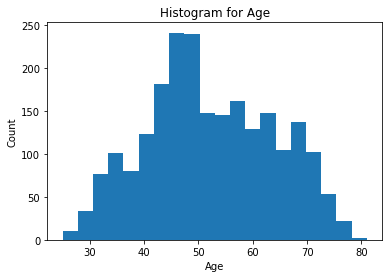

In [18]:
# Histogram for Age volumn
plt.hist(df['Age'], bins = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram for Age')
plt.show()

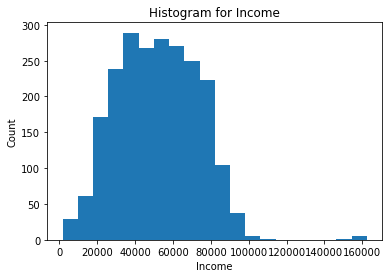

In [19]:
# Histogram for Income volumn
plt.hist(df['Income'], bins = 20)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram for Income')
plt.show()

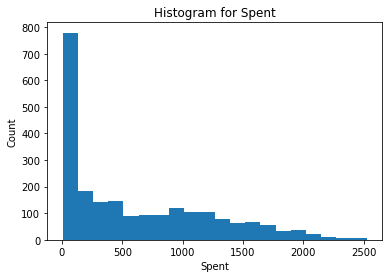

In [20]:
# Histogram for Spent volumn
plt.hist(df['Spent'], bins = 20)
plt.xlabel('Spent')
plt.ylabel('Count')
plt.title('Histogram for Spent')
plt.show()

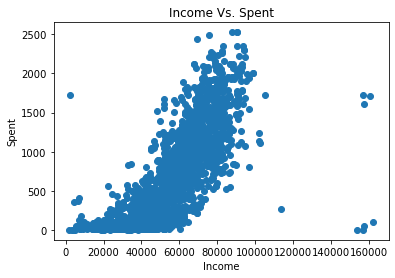

In [21]:
# Scatter plot for Income vs. Spent
plt.scatter(df['Income'], df['Spent'])
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Income Vs. Spent')
plt.show()

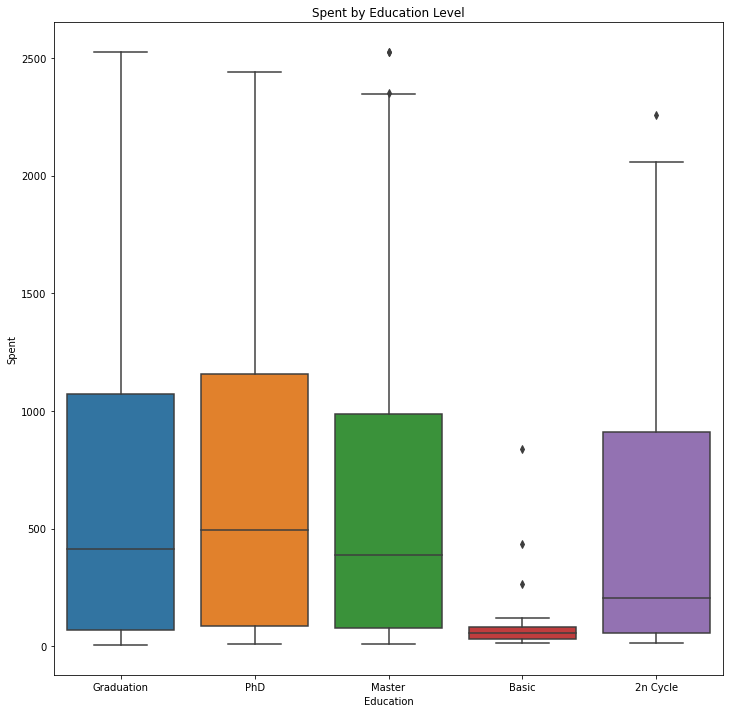

In [22]:
# Box plot for Spent by Education Level
plt.figure(figsize=(12, 12))
sns.boxplot(data=df, x='Education', y='Spent')
plt.title('Spent by Education Level')
plt.show()

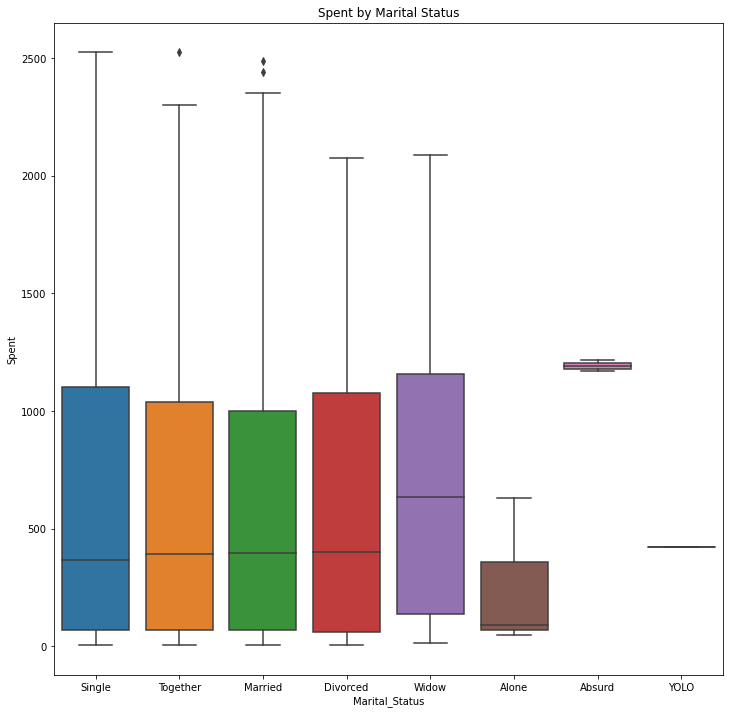

In [23]:
# Box plot for Spent by Marital Status
plt.figure(figsize=(12, 12))
sns.boxplot(data=df, x='Marital_Status', y='Spent')
plt.title('Spent by Marital Status')
plt.show()

In [24]:
LE=LabelEncoder()

In [25]:
df['Education']=df[['Education']].apply(LE.fit_transform)
df['Marital_Status']=df[['Marital_Status']].apply(LE.fit_transform)

In [26]:
df.describe()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,TotalAcceptedCmp,AcceptedCmp,NumTotalPurchases
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,2.395349,3.729428,51958.810579,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,...,0.064401,0.013417,0.008945,0.149374,52.101968,605.986583,0.950805,0.297853,0.206619,14.872540
std,1.122978,1.075932,21411.384172,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,...,0.245520,0.115077,0.094173,0.356536,11.703281,601.865156,0.752204,0.678737,0.404970,7.677874
min,0.000000,0.000000,1730.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,35502.500000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,69.000000,0.000000,0.000000,0.000000,8.000000
50%,2.000000,4.000000,51684.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,51.000000,396.500000,1.000000,0.000000,0.000000,15.000000
75%,3.000000,5.000000,68275.750000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,62.000000,1045.500000,1.000000,0.000000,0.000000,21.000000
max,4.000000,7.000000,162397.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,81.000000,2525.000000,3.000000,4.000000,1.000000,44.000000


### Logistic Regression

In [27]:
# Combine the numerical features 
features_model = ['Education', 'Marital_Status', 'Income', 'Recency', 'Age', 'Spent', 'Children', 'NumTotalPurchases']
data_model_X = df[features_model]

In [28]:
# Check the contents of data_model_X
data_model_X

,Education,Marital_Status,Income,Recency,Age,Spent,Children,NumTotalPurchases
0,2,4,58138.0,58,64,1617,0,25
1,2,4,46344.0,38,67,27,2,6
2,2,5,71613.0,26,56,776,0,21
3,2,5,26646.0,26,37,53,1,8
4,4,3,58293.0,94,40,422,1,19
...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,46,54,1341,1,18
2236,4,5,64014.0,56,75,444,3,22
2237,2,2,56981.0,91,40,1241,0,19
2238,3,5,69245.0,8,65,843,1,23


In [29]:
# Create data_model_y for dependent vatiable AcceptedCmp
data_model_y = df.AcceptedCmp

# import package to split the data into train and test
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.25, random_state=8)

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [31]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Accepted and Not-Accepted
print('\n')
print('No. of Accepted and Not-Accepted in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Accepted and Not-Accepted in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  1677
No. of samples in validation set: 559


No. of Accepted and Not-Accepted in the training set:
0    1333
1     344
Name: AcceptedCmp, dtype: int64


No. of Accepted and Not-Accepted in the validation set:
0    441
1    118
Name: AcceptedCmp, dtype: int64


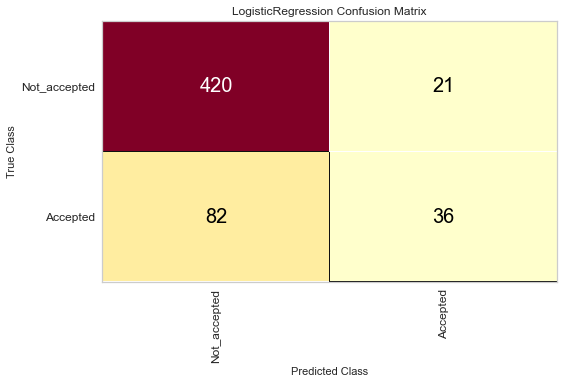

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
# Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the model 
model = LogisticRegression(solver='liblinear')

# Create Confusion Matrix 
classes = ['Not_accepted','Accepted']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

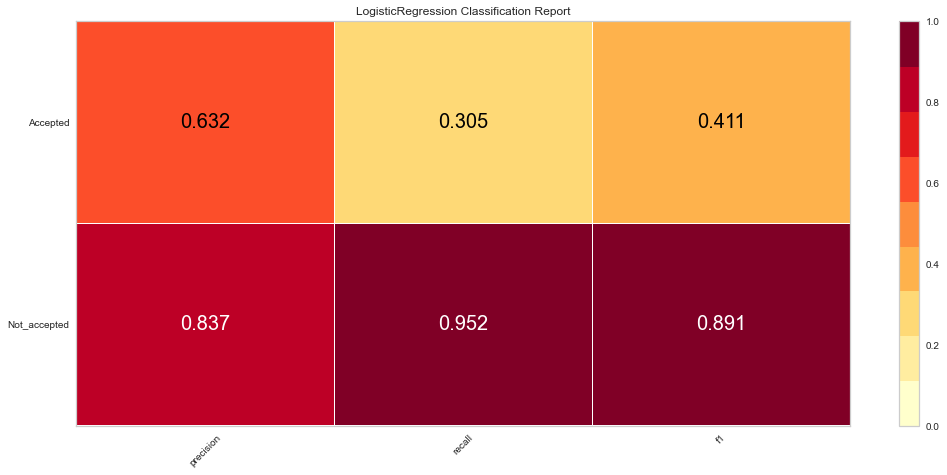

In [33]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

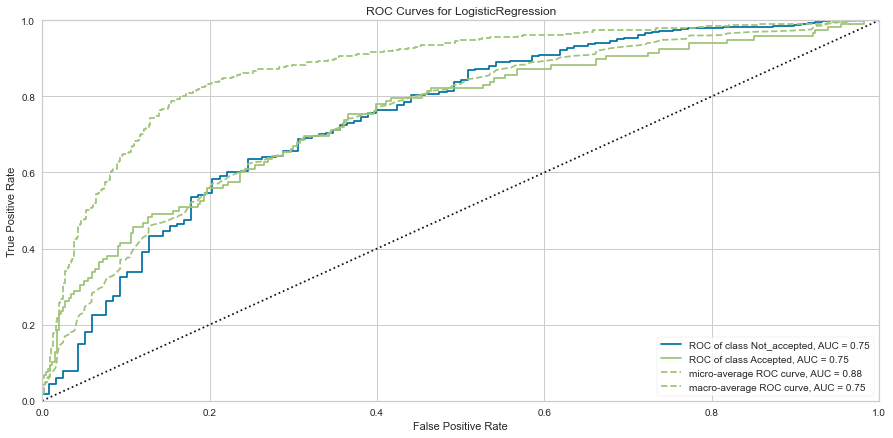

In [34]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [35]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.815742397137746


In [36]:
# Logistic Regression Hyperparameter tuning using GridSearchCV

#Import RepeatedStratifiedKFold and GridSearchCV 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [37]:
# Set parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.824503 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.821910 (0.019868) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.821910 (0.019868) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.821910 (0.019868) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821910 (0.019868) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.821910 (0.019868) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.821710 (0.019972) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.821910 (0.019868) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821910 (0.019868) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with:

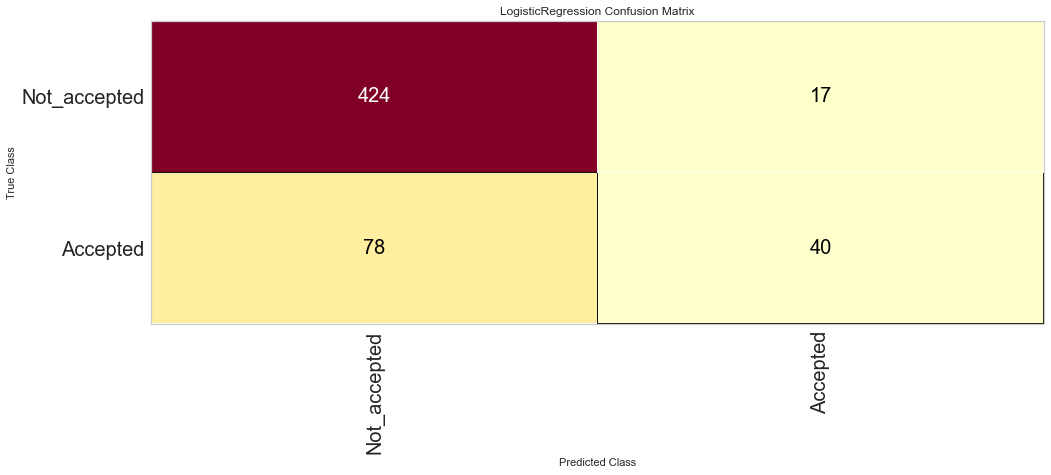

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
# Instantiate the model using best parameters
model = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

# Create Confusion Matrix 
classes = ['Not_accepted','Accepted']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

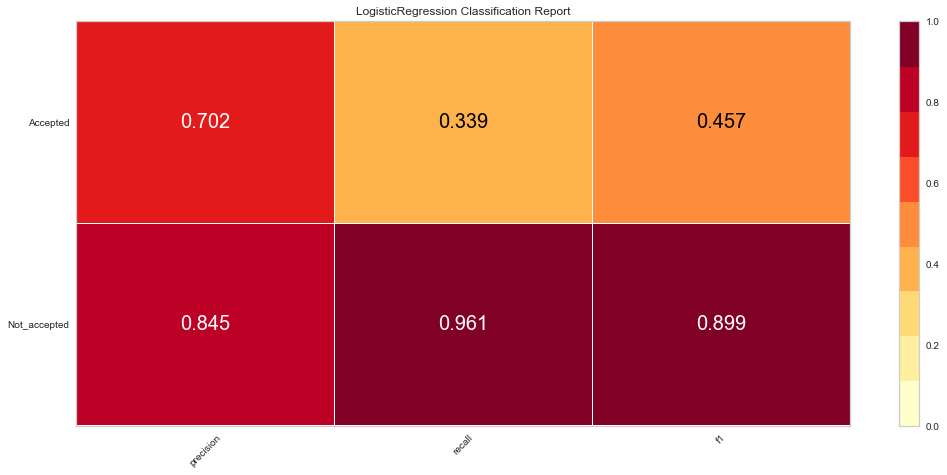

In [39]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

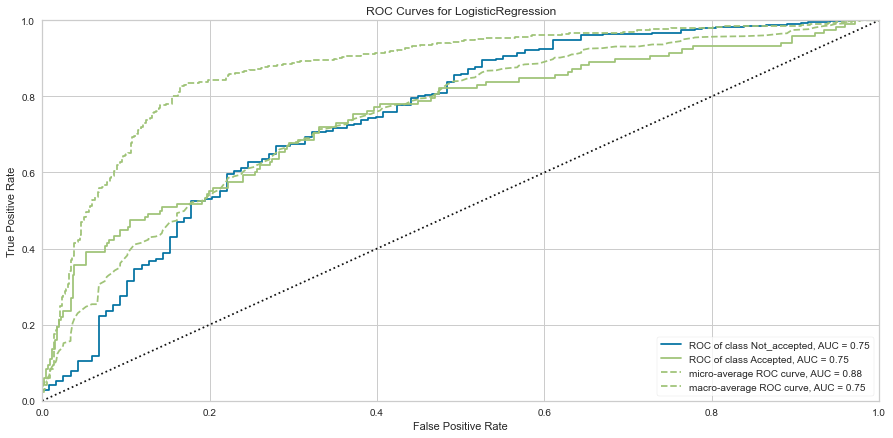

In [40]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [41]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.8300536672629696


### Random Forest Classifier

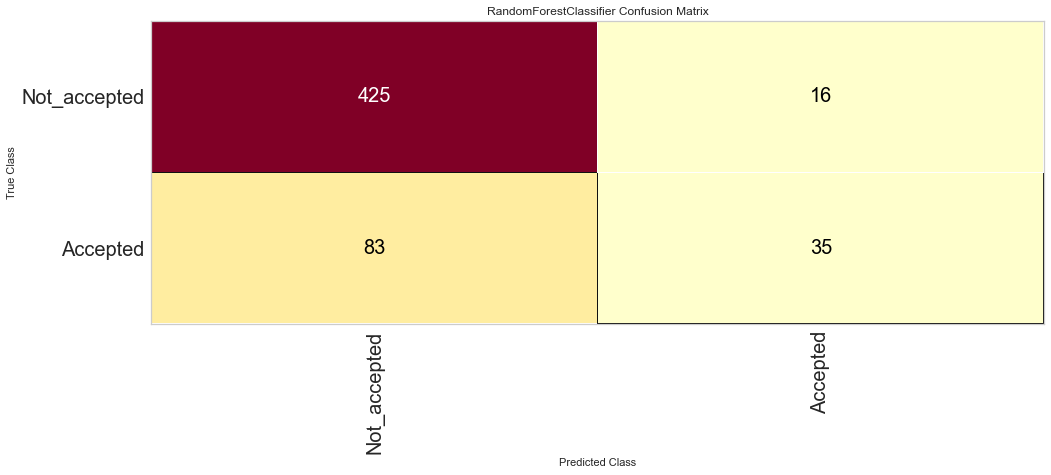

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model 
model = RandomForestClassifier()

# Create Confusion Matrix 
classes = ['Not_accepted','Accepted']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

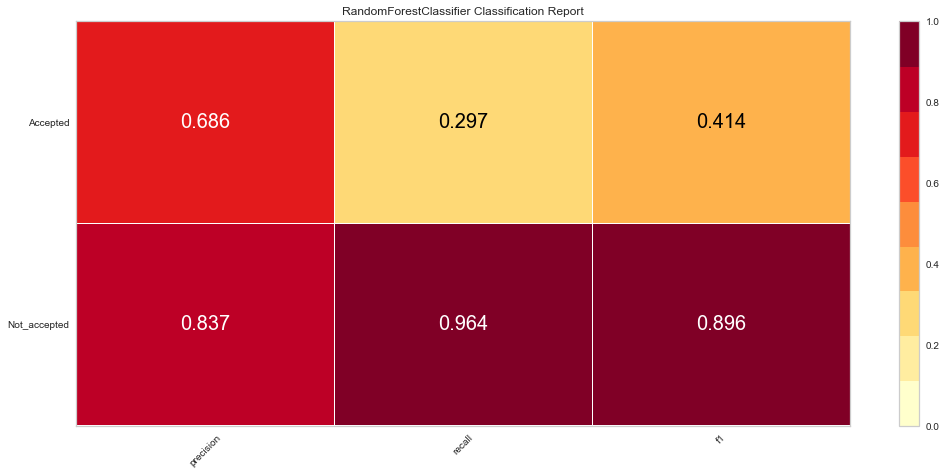

In [43]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

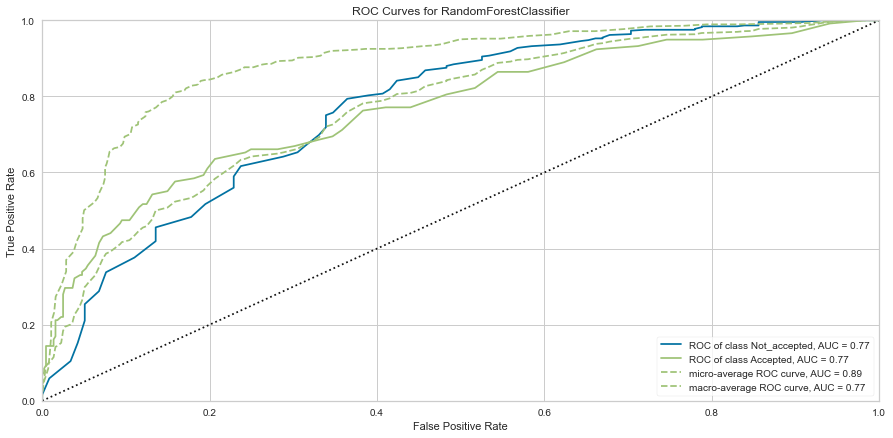

In [44]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [45]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.8228980322003577


In [46]:
# Random Forest hyperparameter tuning using RandomizedSearchCV

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_model_X, data_model_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=42, verbose=2)

In [50]:
# Find the best parameters
rf_random.best_params_

{'n_estimators': 60,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [51]:
# Create Random Forest Classifier object using best parameters
model = RandomForestClassifier(n_estimators=60,
                               min_samples_split=5,
                               min_samples_leaf=1,
                               max_features='sqrt',
                               max_depth=60,
                               bootstrap=False,
                               random_state=42, 
                               n_jobs=-1)

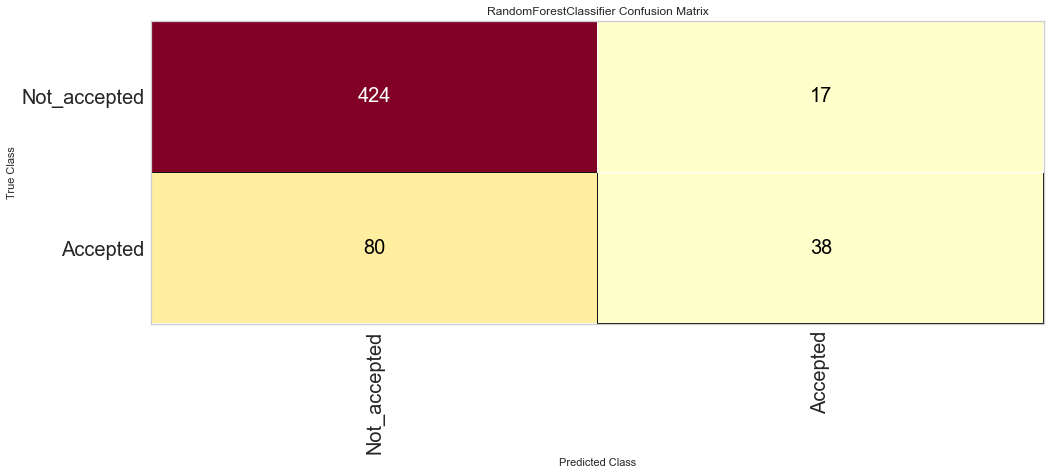

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
# Create Confusion Matrix 
classes = ['Not_accepted','Accepted']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

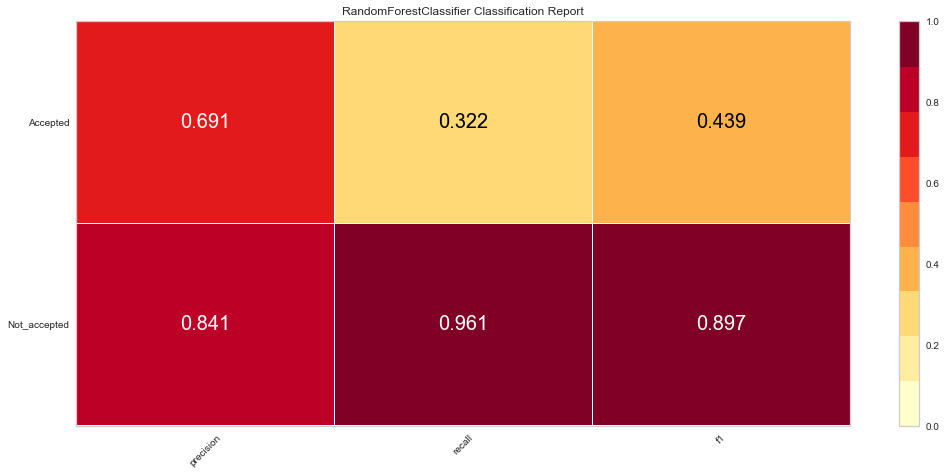

In [53]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

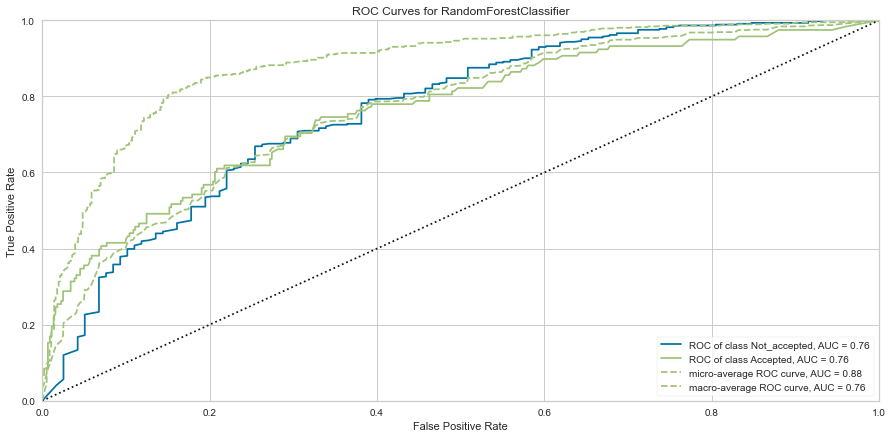

In [54]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [55]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.8264758497316637


### Decision Tree Classifier

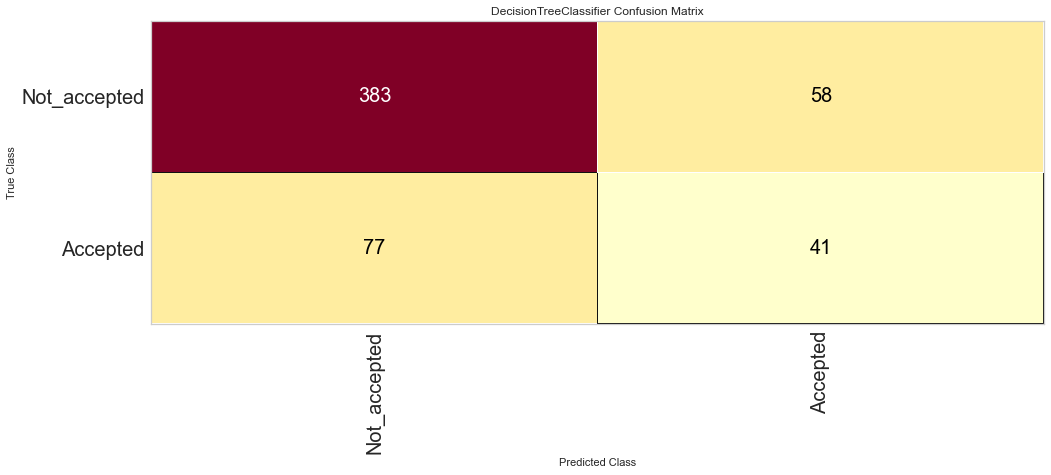

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [56]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the  model 
model = DecisionTreeClassifier()

# Create Confusion Matrix 
classes = ['Not_accepted','Accepted']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

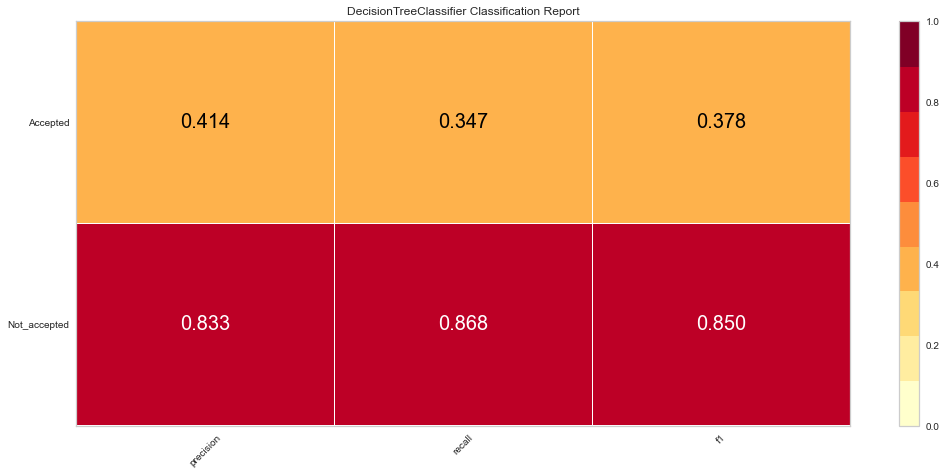

In [57]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

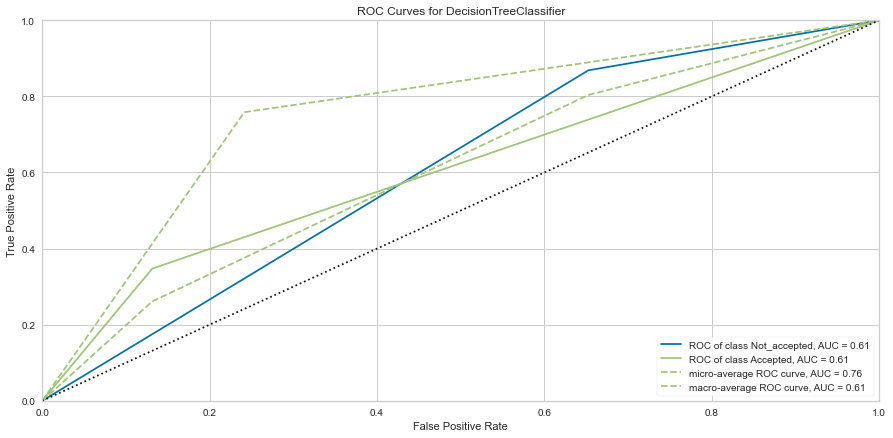

In [58]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [59]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7584973166368515


In [60]:
# Decision Tree Hyperparameter tuning using GridSearchCV

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [61]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [62]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Wall time: 348 ms


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [63]:
# Find the best parameters
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50)

In [64]:
# Create Decision Tree Classifier object using best parameters
model = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=3, 
                               min_samples_leaf=50,
                               random_state=42)

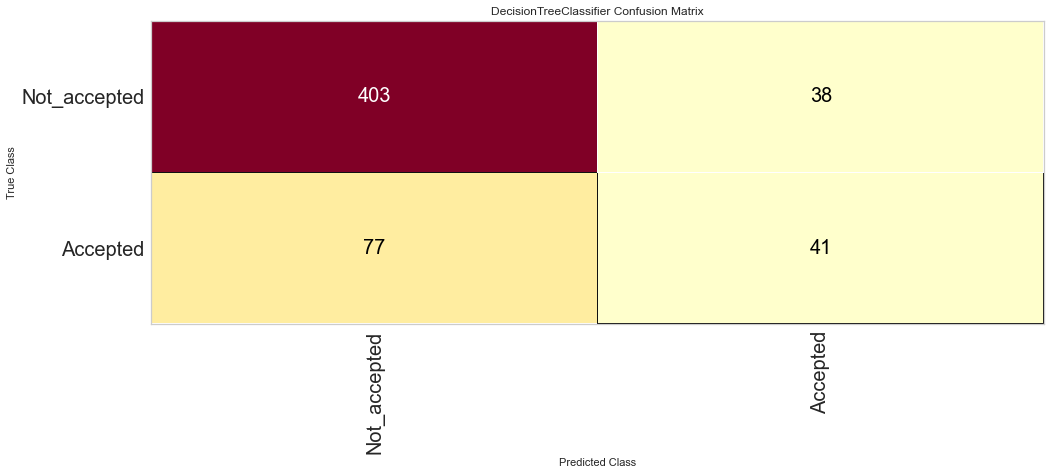

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [65]:
# Create Confusion Matrix 
classes = ['Not_accepted','Accepted']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

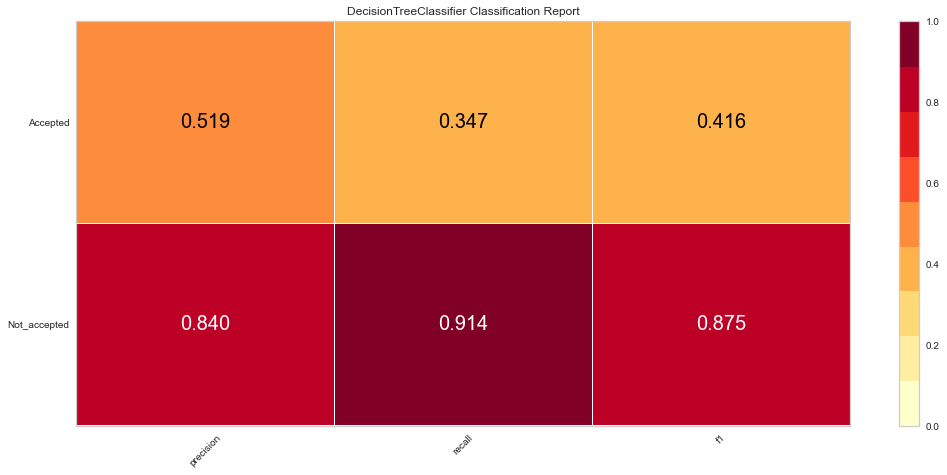

In [66]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

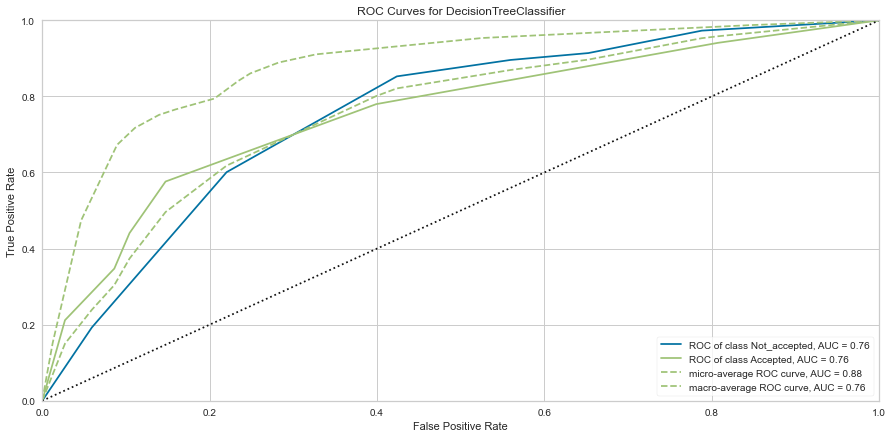

In [67]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [68]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7942754919499105
